<a href="https://colab.research.google.com/github/amul-dhungel/Learning-Path-of-Zummit-InfoLabs/blob/main/7.0%20CNN%20for%20MNIST%20digit/MNIST_using_CNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [23]:
import numpy as np
import cv2
from google.colab.patches import cv2_imshow
np.random.seed(123)
from matplotlib import pyplot as plt
from keras.models import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Convolution2D, MaxPooling2D

from keras.utils import np_utils
from keras.datasets import mnist

In [2]:
(X_train, y_train), (X_test, y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


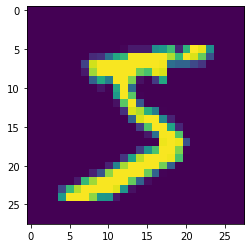

In [3]:
# to show image version
plt.imshow(X_train[0])
plt.show()

In [4]:
X_train = X_train.reshape(X_train.shape[0],28, 28, 1) 
X_test = X_test.reshape(X_test.shape[0], 28, 28, 1)

In [5]:
# converting train and test data pixel values in float32 for normalizing
X_train = X_train.astype('float32') / 255.0
X_test = X_test.astype('float32') / 255.0

In [6]:
Y_train = np_utils.to_categorical(y_train, 10) 
Y_test = np_utils.to_categorical(y_test, 10)

In [10]:
model = Sequential()

In [11]:
model.add(Convolution2D(32, (3, 3), activation='relu', input_shape=(28,28,1))) 
model.add(Convolution2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(10, activation='softmax'))

In [13]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [14]:
model.fit(X_train, Y_train, batch_size=32, epochs=10, verbose=1)

Epoch 1/10
1875/1875 [==============================] - 120s 63ms/step - loss: 0.1947 - accuracy: 0.9410
Epoch 2/10
1875/1875 [==============================] - 114s 61ms/step - loss: 0.0847 - accuracy: 0.9746
Epoch 3/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0630 - accuracy: 0.9808
Epoch 4/10
1875/1875 [==============================] - 112s 60ms/step - loss: 0.0536 - accuracy: 0.9837
Epoch 5/10
1875/1875 [==============================] - 113s 60ms/step - loss: 0.0457 - accuracy: 0.9858
Epoch 6/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0422 - accuracy: 0.9871
Epoch 7/10
1875/1875 [==============================] - 115s 61ms/step - loss: 0.0359 - accuracy: 0.9886
Epoch 8/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0355 - accuracy: 0.9891
Epoch 9/10
1875/1875 [==============================] - 116s 62ms/step - loss: 0.0321 - accuracy: 0.9896
Epoch 10/10
1875/1875 [==============================] 

In [16]:
model.predict(X_test)

array([[2.02474586e-15, 1.08629661e-09, 2.87879161e-12, ...,
        9.99999881e-01, 3.19307840e-12, 8.30410869e-08],
       [1.63309687e-12, 2.29584316e-08, 1.00000000e+00, ...,
        8.89225437e-15, 3.90823622e-16, 1.24676105e-18],
       [3.59612873e-09, 9.99999166e-01, 9.48837275e-09, ...,
        6.77821443e-09, 5.72670046e-07, 3.88044654e-08],
       ...,
       [6.94713324e-20, 1.29931316e-10, 2.99236941e-15, ...,
        6.08450703e-12, 9.91108307e-11, 3.42022055e-09],
       [1.46776479e-20, 1.30206219e-17, 8.23391738e-21, ...,
        3.02902415e-18, 1.18138588e-09, 2.86445918e-15],
       [1.69094133e-12, 2.31299541e-14, 1.12332775e-10, ...,
        2.51934316e-18, 1.69434318e-13, 1.81260339e-16]], dtype=float32)

In [27]:
for i in np.random.choice(np.arange(0, len(Y_test)), size = (10,)):
	
	probs = model.predict(X_test[np.newaxis, i])
	prediction = probs.argmax(axis=1)
 
	image = (X_test[i] * 255).reshape((28, 28)).astype("uint8")
 
	print("Actual digit is {0}, predicted {1}".format(Y_test[i], prediction[0]))
	cv2_imshow( image)
	cv2.waitKey(0)    

Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.], predicted 1


Actual digit is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], predicted 6


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


Actual digit is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], predicted 6


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.], predicted 9


Actual digit is [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.], predicted 4


Actual digit is [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.], predicted 6


Actual digit is [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.], predicted 5
